# <font color=blue>Assignments for "Feature Engineering - Part 1"</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from scipy.stats import jarque_bera
from scipy.stats import normaltest

%matplotlib inline

In this assignment, you will continue to study the `Students Performance` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

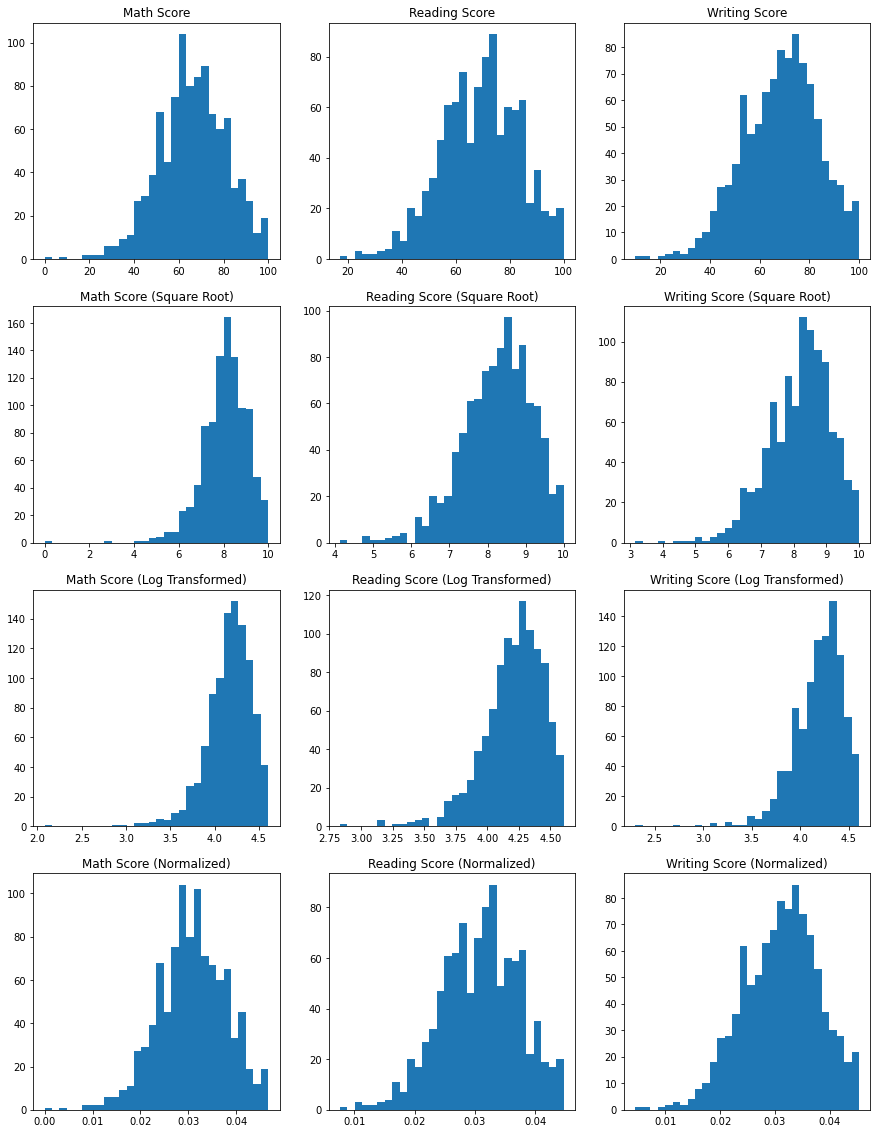

In [3]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 3, 1)
plt.hist(df['math score'], bins=30)
plt.title('Math Score')

plt.subplot(4, 3, 2)
plt.hist(df['reading score'], bins=30)
plt.title('Reading Score')

plt.subplot(4, 3, 3)
plt.hist(df['writing score'], bins=30)
plt.title('Writing Score')

plt.subplot(4, 3, 4)
plt.hist(np.sqrt(df['math score']), bins=30)
plt.title('Math Score (Square Root)')

plt.subplot(4, 3, 5)
plt.hist(np.sqrt(df['reading score']), bins=30)
plt.title('Reading Score (Square Root)')

plt.subplot(4, 3, 6)
plt.hist(np.sqrt(df['writing score']), bins=30)
plt.title('Writing Score (Square Root)')

plt.subplot(4, 3, 7)
plt.hist(np.log(df[df['math score'] != 0]['math score']), bins=30)
plt.title('Math Score (Log Transformed)')

plt.subplot(4, 3, 8)
plt.hist(np.log(df[df['reading score'] != 0]['reading score']), bins=30)
plt.title('Reading Score (Log Transformed)')

plt.subplot(4, 3, 9)
plt.hist(np.log(df[df['writing score'] != 0]['writing score']), bins=30)
plt.title('Writing Score (Log Transformed)')

plt.subplot(4, 3, 10)
plt.hist(normalize(np.array(df['math score']).reshape(1,-1)).reshape(-1,1), bins=30)
plt.title('Math Score (Normalized)')

plt.subplot(4, 3, 11)
plt.hist(normalize(np.array(df['reading score']).reshape(1,-1)).reshape(-1,1), bins=30)
plt.title('Reading Score (Normalized)')

plt.subplot(4, 3, 12)
plt.hist(normalize(np.array(df['writing score']).reshape(1,-1)).reshape(-1,1), bins=30)
plt.title('Writing Score (Normalized)')

plt.show()

In [4]:
pd.options.display.float_format = '{:.5f}'.format

variables = ['math score', 'reading score' , 'writing score']
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for variable in variables:
    jb_stats = jarque_bera(np.log(df[df[variable] != 0][variable]))
    norm_stats = normaltest(np.log(df[df[variable] != 0][variable]))
    distribution_tests = distribution_tests.append({"variable": variable,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,math score,1733.57397,0.00000,335.09114,0.00000
1,reading score,495.12732,0.00000,209.77151,0.00000
2,writing score,1410.93701,0.00000,318.96921,0.00000


**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [5]:
df['total score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

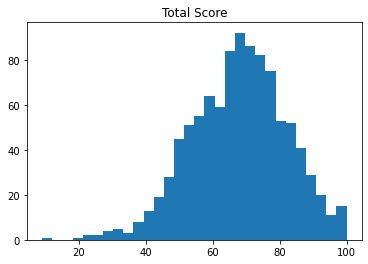

In [6]:
plt.hist(df['total score'], bins=30)
plt.title('Total Score')
plt.show()

In [7]:
jb_stats = jarque_bera(np.log(df[df['total score'] != 0]['total score']))
norm_stats = normaltest(np.log(df[df['total score'] != 0]['total score']))
print(
    "variable: {}".format('total score'),
    "jarque_bera_stats: {:.5f}".format(jb_stats[0]),
    "jarque_bera_p_value: {:.5f}".format(jb_stats[1]),
    "normal_stats: {:.5f}".format(norm_stats[0]),
    "normal_p_value: {:.5f}".format(norm_stats[1]),
    sep='\n'
)

variable: total score
jarque_bera_stats: 2167.03935
jarque_bera_p_value: 0.00000
normal_stats: 361.83694
normal_p_value: 0.00000


In [8]:
df['total score normalized'] = normalize(np.array(df['total score']).reshape(1, -1)).reshape(-1, 1)

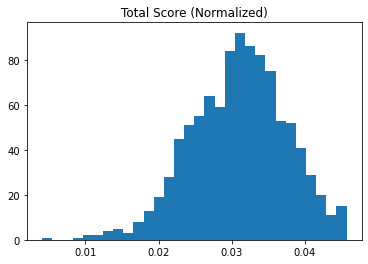

In [9]:
plt.hist(df['total score normalized'], bins=30)
plt.title('Total Score (Normalized)')
plt.show()

In [10]:
jb_stats = jarque_bera(df['total score normalized'])
norm_stats = normaltest(df['total score normalized'])
print(
    "variable: {}".format('total score'),
    "jarque_bera_stats: {:.5f}".format(jb_stats[0]),
    "jarque_bera_p_value: {:.5f}".format(jb_stats[1]),
    "normal_stats: {:.5f}".format(norm_stats[0]),
    "normal_p_value: {:.5f}".format(norm_stats[1]),
    sep='\n'
)

variable: total score
jarque_bera_stats: 15.45339
jarque_bera_p_value: 0.00044
normal_stats: 15.18672
normal_p_value: 0.00050


**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

In [11]:
print(df.groupby('gender')['total score'].mean(), "\n")
print(df.groupby('race/ethnicity')['total score'].mean(), "\n")
print(df.groupby('parental level of education')['total score'].mean(), "\n")
print(df.groupby('lunch')['total score'].mean(), "\n")
print(df.groupby('test preparation course')['total score'].mean())

gender
female   69.56950
male     65.83748
Name: total score, dtype: float64 

race/ethnicity
group A   62.99251
group B   65.46842
group C   67.13166
group D   69.17939
group E   72.75238
Name: total score, dtype: float64 

parental level of education
associate's degree   69.56907
bachelor's degree    71.92373
high school          63.09694
master's degree      73.59887
some college         68.47640
some high school     65.10801
Name: total score, dtype: float64 

lunch
free/reduced   62.19906
standard       70.83721
Name: total score, dtype: float64 

test preparation course
completed   72.66946
none        65.03894
Name: total score, dtype: float64


In [12]:
df['gender_num'] = pd.get_dummies(df['gender'], drop_first=True).rename({'male': 'gender_num'}, axis=1)
df['race/ethnicity_num'] = df['race/ethnicity'].replace({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 4, 'group E': 5})
df['parental_education_num'] = df['parental level of education'].replace(
    {"some high school": 0,
     "high school": 1,
     "some college": 2,
     "associate's degree": 4,
     "bachelor's degree": 5,
     "master's degree": 6})
df['lunch_num'] = df['lunch'].replace({'free/reduced': 0, 'standard': 1})
df['test_prep_num'] = df['test preparation course'].replace({'none': 0, 'completed': 1})

In [13]:
df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course',
         'math score', 'reading score', 'writing score', 'total score normalized'], axis=1).corr()

,total score,gender_num,race/ethnicity_num,parental_education_num,lunch_num,test_prep_num
total score,1.00000,-0.13086,0.18198,0.20461,0.29006,0.25671
gender_num,-0.13086,1.00000,0.01181,-0.04272,0.02137,0.00603
race/ethnicity_num,0.18198,0.01181,1.00000,0.08109,0.04274,0.01023
parental_education_num,0.20461,-0.04272,0.08109,1.00000,-0.02166,0.00018
lunch_num,0.29006,0.02137,0.04274,-0.02166,1.00000,-0.01704
test_prep_num,0.25671,0.00603,0.01023,0.00018,-0.01704,1.00000


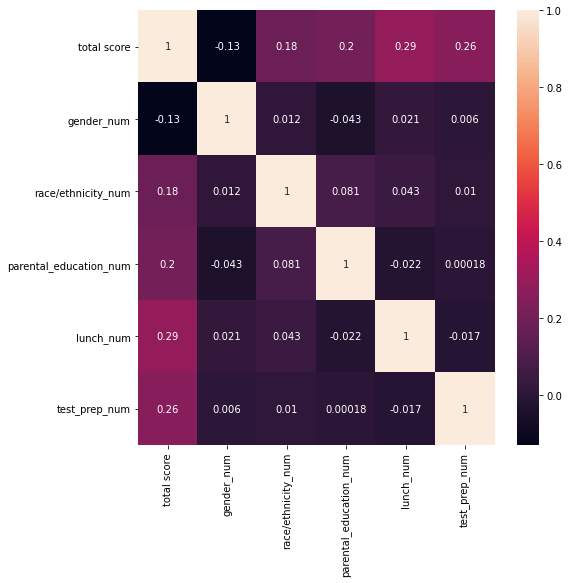

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course',
         'math score', 'reading score', 'writing score', 'total score normalized'], axis=1).corr(),
            annot=True)
plt.show()

**lunch** and **test preparation course** variables seem to have the highest correlation with the target variable **total score**.

**(4)** Does the test preparation course have an impact on the target variable you created?

In [15]:
print(df.groupby('test preparation course')['total score'].mean())

test preparation course
completed   72.66946
none        65.03894
Name: total score, dtype: float64


Yes, it has the **second highest correlation** with the target variable, after lunch. Also, average score of the people who completed test perparation course and those who not differ by _7 points_.